# Twitter Sentiment Analysis

### 1. Import Libraries

Import all the libraries to be used in this notebook. We load the initial libraries at the beginning and keep on adding more libraries as we go along on the project

In [75]:
# Import Libraries

import tweepy # for tweet mining
from textblob import TextBlob # TextBlob - Python library for processing textual data
from wordcloud import WordCloud # WordCloud - Python library for creating image wordclouds
from nltk.sentiment.vader import SentimentIntensityAnalyzer #  lexicon and rule-based sentiment analysis tool
import pandas as pd # for data manipulation and analysis
import numpy as np # for working with arrays and carrying out mathematical operations.
import re # In-built regular expressions library
import os # to access environment from the operating system 
import string # Inbuilt string library
import glob # to retrieve files/pathnames matching a specified pattern. 
import matplotlib.pyplot as plt  # for plotting
plt.style.use('fivethirtyeight')
%matplotlib inline

In [76]:
from dotenv import load_dotenv  # loading the  environment 


In [77]:
# Loading Environment from the operating system
load_dotenv()

True

In [353]:
# Natural Language Processing Toolkit
import nltk
import spacy
import emoji
import stop_words
from textblob import TextBlob
# Tokenize - large quantity of text is divided into smaller parts 
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk import pos_tag # For Parts of Speech tagging
from collections import Counter # count the key-value pairs
from spacy import displacy # dependency visualizer that show model's predictions
nlp = spacy.load("en_core_web_sm") # English pipeline optimization
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

### 2. Tweets Mining

We are using the Tweepy library for Python to scrape tweets. We created a developer account with Twitter to get the keys used below for this task.

In [79]:
# Get the API keys from env

consumer_key = os.getenv("TWITTER_API_KEY")
consumer_secret_key = os.getenv("TWITTER_API_SECRET_KEY")
access_token = os.getenv("TWITTER_ACCESS_TOKEN")
access_token_secret = os.getenv("TWITTER_ACCESS_TOKEN_SECRET")

# Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret_key)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [80]:
# checking the API keys validate or not

In [81]:
#type(consumer_key)

In [82]:
#type(consumer_secret_key)

In [83]:
#type(access_token)

In [84]:
#type(access_token_secret)

#### User-defined Functions for Tweets Mining

We created a functions for searching with different phrases, Example "EV Stock", "Best EV Stock", "EV Stock Future", "Top EV Maker". We do  different searches and each result store in a csv file. This is because we can be consistant with the data as we work along. 

In [85]:
def write_df_to_csv(df, file_name):
    df.to_csv(file_name, index=False)

In [86]:
def getTweets():
    keyword = input("Please enter keyword or hashtag to search: ")
    noOfTweet = int(input ("Number of tweets to analyze: "))
    tweet_list = []
    # Collect tweets using the Cursor object
    tweets = tweepy.Cursor(api.search, 
                           q=keyword, 
                           keyword = keyword + "  -filter:links AND -filter:retweets AND -filter:replies", 
                          lang="en",
                          tweet_mode='extended' ).items(noOfTweet)
     # Each item in the iterator has various attributes that you can access to get information about each tweet
    for tweet in tweets:
        tweet_list.append([
            tweet.id,
            tweet.created_at,
            tweet.full_text,
            tweet.user.location,
            tweet.retweet_count,
            tweet.favorite_count
        ])
    return tweet_list

In [814]:
tweet_list = getTweets()

Please enter keyword or hashtag to search: EV Best Stock
Number of tweets to analyze: 500


In [815]:
tweet_list_df = pd.DataFrame(tweet_list,columns=["Id","Date", "Tweets","Location","Retweets","Favorite"])
tweet_list_df.head()

Id                Date  \
0  1421382839300415493 2021-07-31 08:10:51   
1  1421236926569357312 2021-07-30 22:31:03   
2  1421183826143977473 2021-07-30 19:00:03   
3  1421156134036066690 2021-07-30 17:10:00   
4  1421147852328210440 2021-07-30 16:37:06   

                                              Tweets      Location  Retweets  \
0  @bopinion Wow Bloomberg,wow. How much $ Ford a...                       0   
1  RT @ElectricAutonmy: “This assessment of the l...   Nanaimo, BC         1   
2  “This assessment of the life-cycle GHG emissio...        Canada         1   
3  @ev_spacs Easy, Tough Guy! I am on record sayi...                       0   
4  Top 5 Electric Vehicle EV Stocks in 2021 | Bes...  Surat, India         0   

   Favorite  
0         0  
1         0  
2         3  
3         1  
4         0

In [816]:
tweet_list_df.shape

(55, 6)

In [817]:
### USE DIFFERENT FILE NAME TO SAVE EACH SEARCH. OR else it will replace the previous data
write_df_to_csv(tweet_list_df,"EV_best_2_tweet.csv")

In [705]:
## read_csv with new search data to check. We do not need these lines .. 
## it is just to check if how may tweets we are getting. 

In [19]:
stock_tweet = pd.read_csv("EV_Stock_tweet.csv")

In [24]:
#stock_tweet.shape

In [25]:
#pwd

#### Combining all Tweets into single Pandas Dataframe

In [544]:
path = "/Users/syedahasan/Desktop/EV_Sentiment_Trading"
all_files = glob.glob(path + "/*.csv")
#all_files

In [545]:
tweets = []

for filename in all_files:
    df = pd.read_csv(filename,  index_col=None, parse_dates=True,  header=0) # Convert each csv to a dataframe
    tweets.append(df)

tweets_df = pd.concat(tweets, axis=0, ignore_index=True) # Merge all dataframes
tweets_df['Date']= pd.to_datetime(tweets_df['Date'])
tweets_df.head()

Id                Date  \
0  1420544025631760384 2021-07-29 00:37:42   
1  1420519469865177088 2021-07-28 23:00:08   
2  1419726996104486919 2021-07-26 18:31:07   
3  1419703662092472320 2021-07-26 16:58:24   
4  1419665554038681606 2021-07-26 14:26:58   

                                              Tweets               Location  \
0  @ev_truths @alex_avoigt I think EV technology ...            Seattle, WA   
1  Compact International(1994) Wants to be Top EV...                  U.S.A   
2  RT @cliffski: Toyota are not much better than ...         Louisville, KY   
3  Toyota are not much better than volkswagen. Th...  None of your business   
4  GM China’s Venture Has Big Ambitions Beyond $4...   Vancouver and London   

   Retweets  Favorite  
0         0         0  
1         0         0  
2         2         0  
3         2         4  
4         0         0

In [548]:
# Write all tweets in one csv
# write_df_to_csv(tweets_df,"EV_ALL_TWEETS.csv")

In [335]:
tweets_df.dtypes

Id                   int64
Date        datetime64[ns]
Tweets              object
Location            object
Retweets             int64
Favorite             int64
dtype: object

### 3. Data Cleaning

The dataframe that is created on above, will be cleaned in this section. We are going to search for any duplication and will remove it. It is also important to mention that the Tweet ID was considered as the Primary key for all the dataframe. We are also going to replace the "NaN" values in Location column.

In [336]:
#Get number of rows and columns
tweets_df.shape 

(12676, 6)

In [337]:
tweets_df.duplicated(subset='Tweets').sum() # Check for duplicate values

4786

In [338]:
# drop duplicate values
tweets_df=tweets_df.drop_duplicates(subset='Tweets',keep="last") 

In [339]:
# Check the shape after dropping duplicates
tweets_df.shape 

(7890, 6)

In [340]:
# Check for "NaN" values
tweets_df.isna().any() 

Id          False
Date        False
Tweets      False
Location     True
Retweets    False
Favorite    False
dtype: bool

In [341]:
# Replace "NaN" values with "No Location"
tweets_df['Location']=tweets_df['Location'].fillna('No location') 

In [342]:
# Check for "NaN" values again
tweets_df.isna().any() 

Id          False
Date        False
Tweets      False
Location    False
Retweets    False
Favorite    False
dtype: bool

### 4. Processing

The Individual Tweer needed to be cleaned. We are using several functions to clean the tweet and to show the words used. We are extracting only the adjectives to a new column to view the weight.

In [343]:
# NLTK list of stopwords
from nltk.corpus import stopwords

In [344]:
# Lemmatization is a technique that transforms various morphologies of a word into its base form. 
from nltk.stem import WordNetLemmatizer 
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

In [345]:
def clean_tweet(text):
    text = text.lower()  #has to be in place
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # Remove @mentions
    text = re.sub(r'#', '', text)  # Remove # symbol
    text = re.sub(r'$', '', text)  # Remove $ symbol
    text = re.sub(r'RT[\s]+','', text) # Remove RT
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove urls
    text = re.sub(r'https?:\/\/\S+', '', text) # Remove hyperlink
    text = re.sub(r':','', text)
   
    sw = set(stopwords.words('english'))
    sw_addons = {'do', 'of', '$','r', '*,*','-',', ','``','\'s','.','-','public','rt',
                 'company', 'instead','&','’', 'in', 'car','they','\'your', 'what', 'also', 'seeing','agreement',
                 'time','today','ktown','pc','wts','105k','55k','ed','seeing','takeover','brokerages','rap','meet',
                 'vehicle','market','year','news','price','med','lpo','make',
                 'bakersfieldcart','takeaway','late','catching','lates','ranges'}
    words = word_tokenize(text)
    output = [x.lower() for x in words if x.lower() not in sw.union(sw_addons)]
    # Remove punctuations
    unpunctuated_words = [char for char in output if char not in string.punctuation]
    unpunctuated_words = ' '.join(unpunctuated_words)
    
    #return output
    
    return "".join(unpunctuated_words)  # join words with a space in between them

In [346]:
def give_emoji_free_text(text): 
    return emoji.get_emoji_regexp().sub(r'', text)


In [358]:
def sanitize(string):
    """ Sanitize one string """
    emoticon_string = r"""
        (?:
          [<>]?
          [:;=8]                     # eyes
          [\-o\*\']?                 # optional nose
          [\)\]\(\[dDpP/\:\}\{@\|\\] # mouth      
          |
          [\)\]\(\[dDpP/\:\}\{@\|\\] # mouth
          [\-o\*\']?                 # optional nose
          [:;=8]                     # eyes
          [<>]?
        )"""
    stopwords = [w.lower() for w in stop_words.get_stop_words('en')]
    # remove graphical emoji
    string = give_emoji_free_text(string) 

    # remove textual emoji
    string = re.sub(emoticon_string,'',string)

    # normalize to lowercase 
    string = string.lower()

    # spacy tokenizer 
    string_split = [token.text for token in nlp(string)]

    # in case the string is empty 
    if not string_split:
        return '' 

    # join back to string 
    string = ' '.join(string_split)

    # remove user 
    # assuming user has @ in front
    string = re.sub(r"""(?:@[\w_]+)""",'',string)

    #remove # and @
    for punc in '":!@#':
        string = string.replace(punc, '')

    # remove 't.co/' links
    string = re.sub(r'http//t.co\/[^\s]+', '', string, flags=re.MULTILINE)

    # removing stop words 
    string = ' '.join([w for w in string.split() if w not in stopwords])
    string = re.sub(r"http\S+", "", string)
    return string

In [359]:
print(tweets_df['Tweets'][12671])

$DSGT wait what 🧐 this has to be a good sign🤑 
#ev #motorsport #electricvehicles #electricbus #Nasdaq #investing #future #stock #fleet #golf https://t.co/I2Avdf2WQk


In [360]:
print(sanitize(tweets_df['Tweets'][12671]))

$ dsgt wait good sign ev motorsport electricvehicles electricbus nasdaq investing future stock fleet golf 


In [361]:
tweets_df['Tweets'] = tweets_df['Tweets'].apply(sanitize)

In [362]:
 # remove one and two character words
tweets_df['Tweets'] = tweets_df['Tweets'].apply(lambda x: re.sub(r'\b\w{1,3}\b', '', x))
# remove punctuation
tweets_df['Tweets'] = tweets_df['Tweets'].apply(lambda x: re.sub('[^\w\s]', ' ', x))
# remove numerical values
tweets_df['Tweets'] = tweets_df['Tweets'].apply(lambda x: re.sub(r'[0-9]+', '', x))
# \s+ means all empty space (\n, \r, \t)
tweets_df['Tweets'] = tweets_df['Tweets'].apply(lambda x: re.sub('\s+', ' ', x))
    

In [363]:
#tweets_df['Tweets']

In [366]:
tweets_df['Processed_Tweets'] = tweets_df['Tweets'].apply(clean_tweet)

In [367]:
print(tweets_df['Processed_Tweets'][12671])

dsgt wait good sign motorsport electricvehicles electricbus nasdaq investing future stock fleet golf


In [368]:
#tweets_df['Processed_Tweets']

In [369]:
# Helper functions
def all_noun(tweet):
    """
    This function retrieves all the nouns on the given text.
    
    Args:
        text (string): The text to analyze.
        
    Returns:
        nouns (list): A list with all the nouns in the text.
    """
   
    tweet = word_tokenize(tweet)  # convert string to tokens
    tweet = [word for (word, tag) in pos_tag(tweet)
             if tag == "NN"]  # pos_tag module in NLTK library
    return " ".join(tweet)  # join words with a space in between them

In [370]:
# Helper functions
def all_adjectives(tweet):
    """
    This function retrieves all the adjectives on the given text.
    
    Args:
        text (string): The text to analyze.
        
    Returns:
        adjs (list): A list with all the adjectives in the text.
    """
   
    tweet = word_tokenize(tweet)  # convert string to tokens
    tweet = [word for (word, tag) in pos_tag(tweet)
             if tag == "JJ"]  # pos_tag module in NLTK library
    return " ".join(tweet)  # join words with a space in between them

In [371]:
# Apply all_noun function to the new 'Processed Tweets' column to generate a new column called 'Tweets_Nouns'
tweets_df['Tweets_Nouns'] = tweets_df['Processed_Tweets'].apply(all_noun)

In [372]:
tweets_df['Tweets_Adjectives'] = tweets_df['Processed_Tweets'].apply(all_adjectives)

In [373]:
def get_word_counts(t, w):
    """
    This function counts the occurrences of a word in a text.
    
    Args:
        text (string): The text where word counts will be analyzed.
        word (string): The word to look into the text.
        
    Returns:
        word_count (int): The counts of the word in the given text.
    """
    
    # Use the word_tokenize module from NLTK to tokenize the text
    tok = word_tokenize(t)
    
    # Create a list with all the tokens retrieved from the text
    tok = [w.lower() for w in tok]
    
    # Count the occurrences of the word in the text
    word_count = tok.count(w)
    
    return word_count

In [374]:
# function to return words to their base form using Lemmatizer
# ref: https://jess-analytics.medium.com/
def preprocessTweetsSentiments(tweet):
    
    tweet_tokens = word_tokenize(tweet)
    lemmatizer = WordNetLemmatizer() # instatiate an object WordNetLemmatizer Class
    lemma_words = [lemmatizer.lemmatize(w) for w in tweet_tokens]
    return " ".join(lemma_words)

In [375]:
# Apply preprocessTweetsSentiments function to the 'Processed Tweets' column to generate a new column
tweets_df['Tweets_Lemmatize'] = tweets_df['Processed_Tweets'].apply(preprocessTweetsSentiments)

In [376]:
# Extract all tweets into one long string with each word separate with a "space"
tweets_long_string = tweets_df['Tweets_Adjectives'].tolist()
tweets_long_string = " ".join(tweets_long_string)

In [377]:
from PIL import Image # for opening, manipulating, and saving many different image file 
# Import Twitter Logo
image = np.array(Image.open('twitter.png'))

In [378]:
# Create function to generate the blue colour for the Word CLoud
def blue_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "hsl(210, 100%%, %d%%)" % random.randint(50, 70)

<Figure size 1008x1296 with 0 Axes>

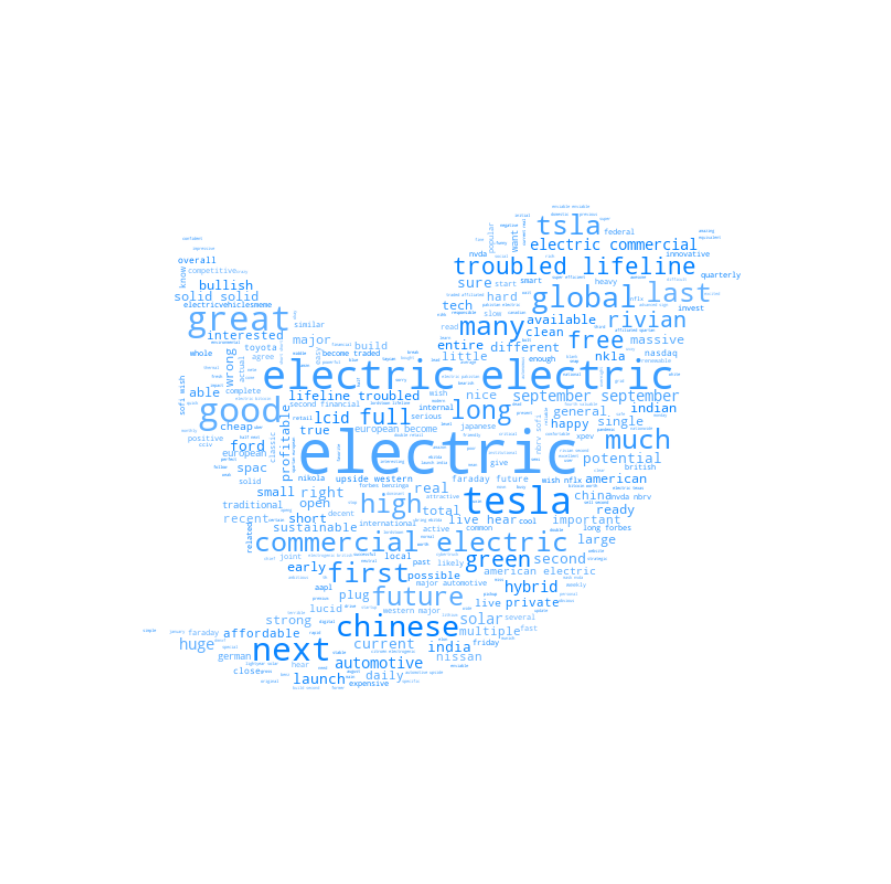

In [379]:
import random # generating random numbers
# Instantiate the Twitter word cloud object
# ref: https://amueller.github.io/word_cloud/auto_examples/masked.html
twitter_wc = WordCloud(background_color='white', max_words=1500, mask=image)

# generate the word cloud
twitter_wc.generate(tweets_long_string)
fig = plt.figure() # Instantiate the figure object
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14)  # set width
fig.set_figheight(18)  # set height

plt.imshow(twitter_wc.recolor(color_func=blue_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()

In [380]:
# Combine all words into a list
tweets_long_string = tweets_df['Tweets_Adjectives'].tolist()
tweets_list=[]
for item in tweets_long_string:
    item = item.split()
    for i in item:
        tweets_list.append(i)

In [381]:
# Use the Built-in Python Collections module to determine Word frequency
counts = Counter(tweets_list)
df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
df.columns = ['Words', 'Count']
df.sort_values(by='Count', ascending=False, inplace=True)
df.head(5)

Words  Count
5   electric   1580
12     tesla    236
75      next    206
30      good    206
26     great    192

### 5. Sentiment Analysis

In this section, the aim was to undertand the sentiment of the Twitter Users while describe Electric Vehicle. 

In [382]:
# Sentiment calculation based on compound score
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return  "Positive" if (result == 1) else "Neutral" if result == 0 else "Negative"

In [383]:
# Sentiment scores dictionaries
tweet_sent = {
    "tweet": [],
    "compound": [],
    "positive": [],
    "neutral": [],
    "negative": [],
    "sentiment": [],
}

# Get sentiment for the tweet
# iterrows() method is used to iterate across the dataframe 
for index, row in tweets_df.iterrows():
    try:
        # Sentiment scoring 
        tweet_sentiment = analyzer.polarity_scores(row["Processed_Tweets"])  # VADER sentiment scores are retrieved for tweets
        tweet_sent["tweet"].append(row["Processed_Tweets"])
        tweet_sent["compound"].append(tweet_sentiment["compound"])
        tweet_sent["positive"].append(tweet_sentiment["pos"])
        tweet_sent["neutral"].append(tweet_sentiment["neu"])
        tweet_sent["negative"].append(tweet_sentiment["neg"])
        tweet_sent["sentiment"].append(get_sentiment(tweet_sentiment["compound"]))
        
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
tweet_sentiment_df = pd.DataFrame(tweet_sent)
tweet_sentiment_df[["polarity","subjectivity"]] = tweets_df["Processed_Tweets"].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

In [384]:
tweet_sentiment_df.head()

tweet  compound  positive  \
0  think technology still pretty room improve bes...    0.9118     0.612   
1            compact international wants brake maker    0.0000     0.000   
2  toyota much better volkswagen legacy companies...    0.8442     0.565   
3  toyota much better volkswagen legacy companies...    0.8442     0.476   
4  china venture ambitions beyond electric bloomberg    0.0000     0.000   

   neutral  negative sentiment  polarity  subjectivity  
0    0.388       0.0  Positive  0.516667      0.600000  
1    1.000       0.0   Neutral  0.100000      0.050000  
2    0.435       0.0  Positive  0.750000      0.400000  
3    0.524       0.0  Positive  0.571429      0.433333  
4    1.000       0.0   Neutral  0.000000      0.000000

In [385]:
## ref : https://towardsdatascience.com/step-by-step-twitter-sentiment-analysis-in-python-d6f650ade58d
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=["Total","Percentage"])
#Count_values for sentiment
count_values_in_column(tweet_sentiment_df,"sentiment")

Total  Percentage
Positive   3930       49.81
Neutral    2876       36.45
Negative   1084       13.74

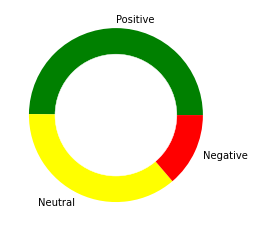

In [386]:
# create data for Pie Chart
pichart = count_values_in_column(tweet_sentiment_df,"sentiment")
names= pichart.index
size=pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color="white")
plt.pie(size, labels=names, colors=["green","yellow","red"])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [387]:
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/syedahasan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [388]:
# Getting the TF-IDF
# A TfidfVectorizer() instance is created by passing the stopwords in English as a parameter.
vectorizer = TfidfVectorizer(stop_words="english")
X_tweets = vectorizer.fit_transform(tweets_df['Tweets_Lemmatize'])

In [389]:
# Getting matrix info
print(f"Matrix shape: {X_tweets.shape}")
print(f"Total number of tweets: {X_tweets.shape[0]}")
print(f"Total number of unique words (tokens): {X_tweets.shape[1]}")

Matrix shape: (7890, 10283)
Total number of tweets: 7890
Total number of unique words (tokens): 10283


In [390]:
# Retrieve words list from tweets
words_tweets = vectorizer.get_feature_names()
#print(words_tweets)

In [391]:
# Getting the TF-IDF weight of each word in corpus as DataFrame
# The mean value of the TF–IDF for each term is used to create the DataFrame.
words_tweets_df = pd.DataFrame(
    list(zip(words_tweets, np.ravel(X_tweets.mean(axis=0)))), columns=["Word", "TF-IDF"]
)

words_tweets_df = words_tweets_df.sort_values(by=["TF-IDF"], ascending=False)

In [392]:
words_tweets_df.head()

Word    TF-IDF
8736     stock  0.028767
2951  electric  0.028567
9160     tesla  0.021217
838    battery  0.013236
7915      sale  0.012429

In [542]:
#Function to ngram
def get_top_n_gram(tweets,ngram_range,n=None):
    countVectorizer = CountVectorizer(ngram_range=ngram_range,stop_words = "english").fit(tweets)
    bag_of_words = countVectorizer.transform(tweets)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in countVectorizer.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
#n2_bigram
n2_bigrams = get_top_n_gram(tweets_df["Processed_Tweets"],(2,2),20)
ndf = pd.DataFrame(n2_bigrams, columns=["Bigrams","Count"]).set_index('Bigrams')

<AxesSubplot:ylabel='Bigrams'>

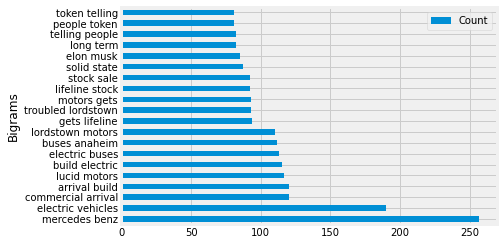

In [543]:
ndf.plot(kind='barh')

In [394]:
tweet_string = ''
for x in tweets_df["Processed_Tweets"]:
    tweet_string += ' ' + x

In [395]:
doc = nlp(tweet_string)

# Render NER visualization with displacy to determine entities for extraction
displacy.render(doc, style='ent')

In [397]:
# Extract geopolitical and organizational entities
entities = [x.text for x in doc.ents if x.label_ in ['GPE', 'ORG']]

In [398]:
# lower and join each entity for word cloud creation
entities = [i.lower().replace(' ', '_') for i in entities]

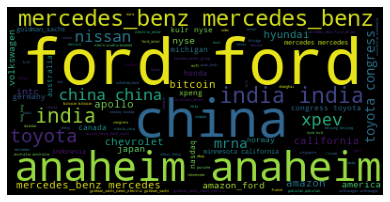

In [400]:
# Generate wordcloud
wc = WordCloud().generate(' '.join(entities))
plt.axis('off')
plt.imshow(wc)

In [451]:
# The Tone Analyzer response is given in JSON format, 
# so the json_normalize function is imported from Pandas to transform the JSON response to a DataFrame.
from pandas import json_normalize

# ToneAnalyzerV3 is the main library to access to the Tone Analyzer via Python.
from ibm_watson import ToneAnalyzerV3

# IAMAuthenticator is used to authenticate your Python application to access the IBM cloud services.
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

import json

In [452]:
# Get the Tone Analyzer API Key and URL
tone_api = os.getenv("IBM_API")
tone_url = os.getenv("IBM_URL")

In [453]:
# Initialize Tone Analyser Client

# Create authentication object
authenticator = IAMAuthenticator(tone_api)

# Create tone_analyzer instance
tone_analyzer = ToneAnalyzerV3(
    version="2017-09-21",
    authenticator=authenticator
)

# Set the service endpoint
tone_analyzer.set_service_url(tone_url)

In [454]:
tweets_sh = tweets_df.iloc[:1000]
tweets_sh = tweets_sh.drop_duplicates('Processed_Tweets', keep='last')

In [455]:
tweet_sh_string = ''
for x in tweets_sh['Processed_Tweets']:
    tweet_sh_string += '. ' + x

In [507]:
# Analyze the text's tone with the 'tone()' method.

# tone(): The general tone analysis, aimed to score tone on short text
# (such as reviews, emails, or social media) or even larger texts (such as articles or blog post)

# it only needs to receive a text to score, however, additional parameters could be used
# https://cloud.ibm.com/apidocs/tone-analyzer?code=python#data-handling

tone_analysis = tone_analyzer.tone( 
    {"text": tweet_sh_string},
    content_type="application/json",
    content_language="en",
    accept_language="en",
).get_result()

# Display tone analysis results
#print(json.dumps(tone_analysis, indent=2))

# On the JSON response, the tone is given for the entire document on the document_tone element 
# as well as for each sentence of the document on the sentences_tone element.

In [511]:
# Sentences Tones
sentences_tone_df = json_normalize(
    data=tone_analysis["sentences_tone"],
    record_path=["tones"],
    meta=["sentence_id", "text"],
)
sentences_tone_df.head()

score     tone_id   tone_name sentence_id  \
0  0.845678         joy         Joy           0   
1  0.751520   tentative   Tentative           0   
2  0.842108  analytical  Analytical           0   
3  0.882284  analytical  Analytical           1   
4  0.607730         joy         Joy           2   

                                                text  
0  . think technology still pretty room improve b...  
1  . think technology still pretty room improve b...  
2  . think technology still pretty room improve b...  
3           compact international wants brake maker.  
4  toyota much better volkswagen legacy companies...

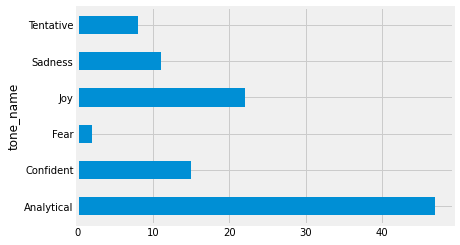

In [510]:
sentences_tone_df.groupby('tone_name')['score'].nunique().plot(kind='barh')
plt.show()

In [488]:
from datetime import datetime, timedelta
import alpaca_trade_api as tradeapi
# The News API allows only a limited number of articles to be accessed each day.
from newsapi.newsapi_client import NewsApiClient

In [465]:
# create a sentiment index from News API headlines and correlate it to S&P 500 daily returns, 
# looking for a text topic that generates the highest correlation.

# Load .env enviroment variables
load_dotenv()
api_key=os.environ["NEWS_API"]
# Set News API Key
newsapi = NewsApiClient(api_key)

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_API_SECRET")

api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

In [468]:
# Set the ticker
ticker = "TSLA"

# Set timeframe to '1D'
timeframe = "1D"

# Set current date and the date from one month ago using the ISO format
current_date = pd.Timestamp(datetime.now(), tz="America/New_York").isoformat()
past_date = pd.Timestamp(datetime.now()- timedelta(30), tz="America/New_York").isoformat()

# Get 4 weeks worth of historical data for AAPL
df = api.get_barset(
    ticker,
    timeframe,
    limit=None,
    start=past_date,
    end=current_date,
    after=None,
    until=None,
).df

# Display data
df.head()

TSLA                                    
                             open    high       low   close    volume
time                                                                 
2021-07-02 00:00:00-04:00  679.00  700.00  673.2600  678.90  25565649
2021-07-06 00:00:00-04:00  681.80  684.00  651.4002  659.49  21785768
2021-07-07 00:00:00-04:00  664.27  665.70  638.3200  644.85  18091390
2021-07-08 00:00:00-04:00  629.22  654.43  620.4600  653.31  21009964
2021-07-09 00:00:00-04:00  653.10  658.91  644.6900  656.99  16736225

In [469]:
# Drop Outer Table Level
df = df.droplevel(axis=1, level=0)

# Use the drop function to drop extra columns
df = df.drop(columns=["open", "high", "low", "volume"])

# Since this is daily data, we can keep only the date (remove the time) component of the data
df.index = df.index.date

# Display sample data
df.head()

close
2021-07-02  678.90
2021-07-06  659.49
2021-07-07  644.85
2021-07-08  653.31
2021-07-09  656.99

In [470]:
# Use the `pct_change` function to calculate daily returns of AAPL
tsla_returns = df.pct_change().dropna()

# Display sample data
tsla_returns.head()

close
2021-07-06 -0.028590
2021-07-07 -0.022199
2021-07-08  0.013119
2021-07-09  0.005633
2021-07-12  0.043410

In [471]:
# Use newsapi client to get most relevant 20 headlines per day in the past month
def get_headlines(keyword):
    all_headlines = []
    all_dates = []    
    date = datetime.strptime(current_date[:10], "%Y-%m-%d")
    end_date = datetime.strptime(past_date[:10], "%Y-%m-%d")
    print(f"Fetching news about '{keyword}'")
    print("*" * 30)
    while date > end_date:
        print(f"retrieving news from: {date}")
        articles = newsapi.get_everything(
            q=keyword,
            from_param=str(date)[:10],
            to=str(date)[:10],
            language="en",
            sort_by="relevancy",
            page=1,
        )
        headlines = []
        for i in range(0, len(articles["articles"])):
            headlines.append(articles["articles"][i]["title"])
        all_headlines.append(headlines)
        all_dates.append(date)
        date = date - timedelta(days=1)
    return all_headlines, all_dates

In [472]:
tsla_headlines, dates = get_headlines("tsla")

Fetching news about 'tsla'
******************************
retrieving news from: 2021-08-01 00:00:00
retrieving news from: 2021-07-31 00:00:00
retrieving news from: 2021-07-30 00:00:00
retrieving news from: 2021-07-29 00:00:00
retrieving news from: 2021-07-28 00:00:00
retrieving news from: 2021-07-27 00:00:00
retrieving news from: 2021-07-26 00:00:00
retrieving news from: 2021-07-25 00:00:00
retrieving news from: 2021-07-24 00:00:00
retrieving news from: 2021-07-23 00:00:00
retrieving news from: 2021-07-22 00:00:00
retrieving news from: 2021-07-21 00:00:00
retrieving news from: 2021-07-20 00:00:00
retrieving news from: 2021-07-19 00:00:00
retrieving news from: 2021-07-18 00:00:00
retrieving news from: 2021-07-17 00:00:00
retrieving news from: 2021-07-16 00:00:00
retrieving news from: 2021-07-15 00:00:00
retrieving news from: 2021-07-14 00:00:00
retrieving news from: 2021-07-13 00:00:00
retrieving news from: 2021-07-12 00:00:00
retrieving news from: 2021-07-11 00:00:00
retrieving news fr

In [ ]:
tsla_headlines, dates = get_headlines("tsla")

In [494]:
ford_headlines, _ = get_headlines("NYSE: F")

Fetching news about 'NYSE: F'
******************************
retrieving news from: 2021-08-01 00:00:00
retrieving news from: 2021-07-31 00:00:00
retrieving news from: 2021-07-30 00:00:00
retrieving news from: 2021-07-29 00:00:00
retrieving news from: 2021-07-28 00:00:00
retrieving news from: 2021-07-27 00:00:00
retrieving news from: 2021-07-26 00:00:00
retrieving news from: 2021-07-25 00:00:00
retrieving news from: 2021-07-24 00:00:00
retrieving news from: 2021-07-23 00:00:00
retrieving news from: 2021-07-22 00:00:00
retrieving news from: 2021-07-21 00:00:00
retrieving news from: 2021-07-20 00:00:00
retrieving news from: 2021-07-19 00:00:00
retrieving news from: 2021-07-18 00:00:00
retrieving news from: 2021-07-17 00:00:00
retrieving news from: 2021-07-16 00:00:00
retrieving news from: 2021-07-15 00:00:00
retrieving news from: 2021-07-14 00:00:00
retrieving news from: 2021-07-13 00:00:00
retrieving news from: 2021-07-12 00:00:00
retrieving news from: 2021-07-11 00:00:00
retrieving news

In [493]:
ev_headlines, _ = get_headlines("electric vehicles")

Fetching news about 'electric vehicles'
******************************
retrieving news from: 2021-08-01 00:00:00
retrieving news from: 2021-07-31 00:00:00
retrieving news from: 2021-07-30 00:00:00
retrieving news from: 2021-07-29 00:00:00
retrieving news from: 2021-07-28 00:00:00
retrieving news from: 2021-07-27 00:00:00
retrieving news from: 2021-07-26 00:00:00
retrieving news from: 2021-07-25 00:00:00
retrieving news from: 2021-07-24 00:00:00
retrieving news from: 2021-07-23 00:00:00
retrieving news from: 2021-07-22 00:00:00
retrieving news from: 2021-07-21 00:00:00
retrieving news from: 2021-07-20 00:00:00
retrieving news from: 2021-07-19 00:00:00
retrieving news from: 2021-07-18 00:00:00
retrieving news from: 2021-07-17 00:00:00
retrieving news from: 2021-07-16 00:00:00
retrieving news from: 2021-07-15 00:00:00
retrieving news from: 2021-07-14 00:00:00
retrieving news from: 2021-07-13 00:00:00
retrieving news from: 2021-07-12 00:00:00
retrieving news from: 2021-07-11 00:00:00
retri

In [489]:
# Instantiate SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [495]:
# Create function that computes average compound sentiment of headlines for each day
def headline_sentiment_summarizer_avg(headlines):
    sentiment = []
    for d in headlines: 
        day_score = []
        for h in d:
            if h == None:
                continue
            else:
                day_score.append(sid.polarity_scores(h)["compound"])
        sentiment.append(sum(day_score) / len(day_score))
    return sentiment

In [505]:
tsla_news = headline_sentiment_summarizer_avg(tsla_headlines)
ford_news = headline_sentiment_summarizer_avg(ford_headlines)
ev_news = headline_sentiment_summarizer_avg(ev_headlines)

In [502]:
# Combine Sentiment Averages into DataFrame
topic_sentiments = pd.DataFrame(
    {
        "tsla_news": tsla_news,
        "ford_news": ford_news,
        "ev_news": ev_news,
    }
)

In [503]:
topic_sentiments.index = pd.to_datetime(dates)

In [504]:
# Merge with RETURNS 
topic_sentiments = tsla_returns.join(topic_sentiments).dropna(how="any")

# Display data
display(topic_sentiments)

close  tsla_news  ford_news   ev_news
2021-07-06 -0.028590   0.131430   0.126255  0.055365
2021-07-07 -0.022199   0.181005   0.394282  0.030485
2021-07-08  0.013119   0.058250   0.170365 -0.036575
2021-07-09  0.005633   0.136315   0.073456  0.077445
2021-07-12  0.043410   0.153710   0.334235  0.082820
2021-07-13 -0.024216   0.157955  -0.001470  0.023465
2021-07-14 -0.023277   0.189300   0.201415  0.079205
2021-07-15 -0.003704   0.108135   0.197965 -0.001305
2021-07-16 -0.010600   0.105875   0.187238  0.045080
2021-07-19  0.003711  -0.151535   0.090394  0.054225
2021-07-20  0.021503   0.214630   0.192295 -0.039210
2021-07-21 -0.007693   0.188100   0.126680 -0.013075
2021-07-22 -0.009320   0.094525   0.095625  0.089615
2021-07-23 -0.008940   0.141590   0.099844 -0.053510
2021-07-26  0.023270   0.127930   0.214300  0.146040
2021-07-27 -0.020523   0.009665   0.140775  0.140715
2021-07-28  0.003397   0.270810   0.143955  0.053165
2021-07-29  0.046973   0.140450   0.192160 -0.018865
2021-07-30  0.015118   0.075310   0.106420  0.082920

In [506]:
# Correlate the headlines' sentiment to returns
topic_sentiments.corr().style.background_gradient()